<a href="https://colab.research.google.com/github/Paranjay33/task3-linear-regression-model/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!pip install pandas scikit-learn matplotlib

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
# Load dataset
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)

# Display first few rows
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
# Check for nulls
df.isnull().sum()

# Define features and target
X = df.drop("medv", axis=1)  # Features
y = df["medv"]  # Target variable

In [6]:
# Split into training and testing sets (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
# Predict on test data
y_pred = model.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R² Score: {r2}")

MAE: 3.189091965887837
MSE: 24.291119474973478
R² Score: 0.6687594935356326


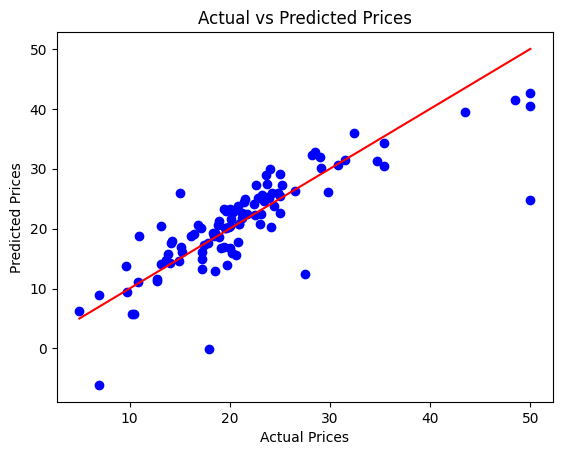

In [9]:
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.show()

In [10]:
# Coefficients and Intercept
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=["Coefficient"])
print("Intercept:", model.intercept_)
coeff_df

Intercept: 30.24675099392366


,Coefficient
crim,-0.113056
zn,0.030110
indus,0.040381
chas,2.784438
nox,-17.202633
rm,4.438835
age,-0.006296
dis,-1.447865
rad,0.262430
tax,-0.010647
